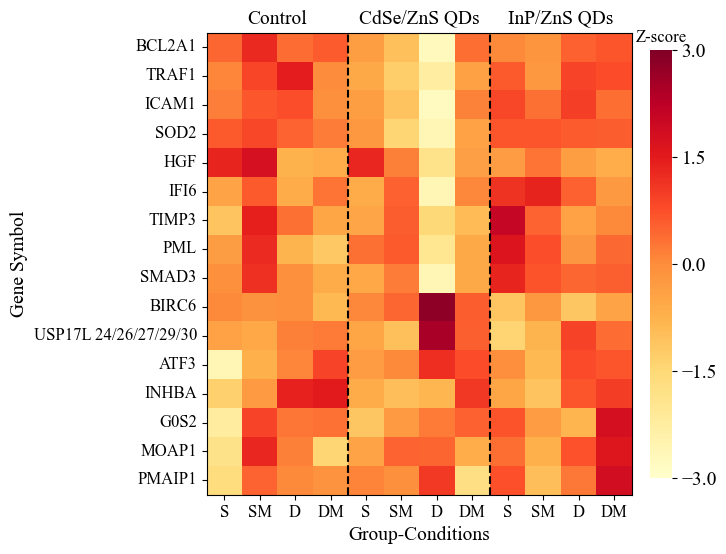

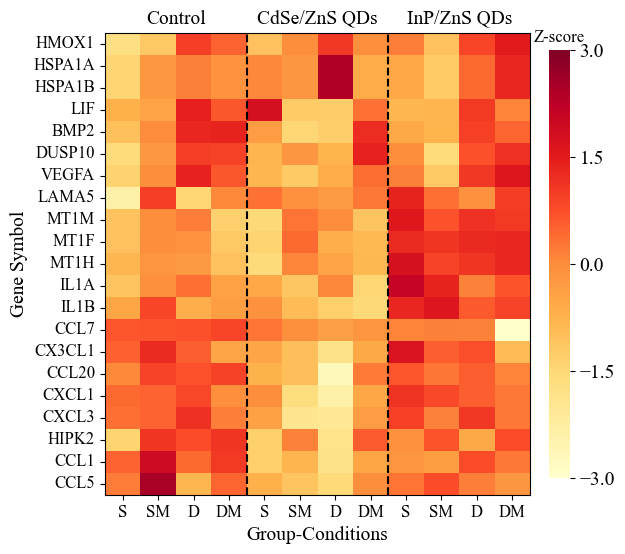

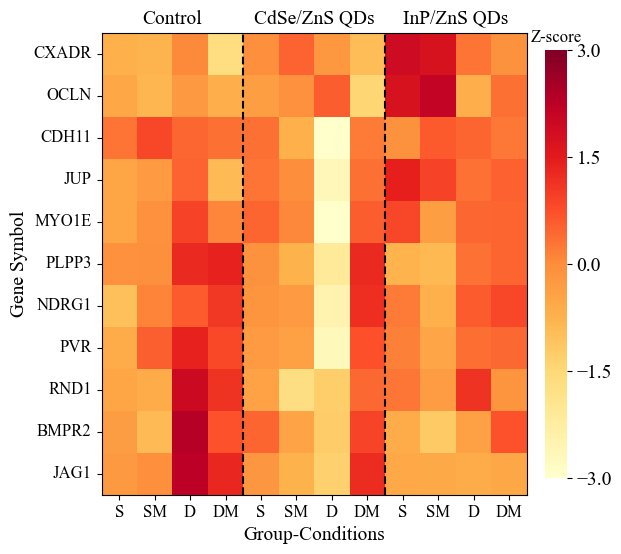

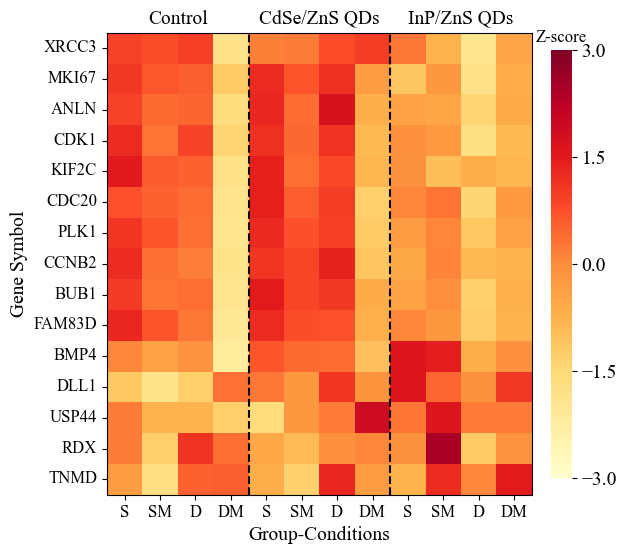

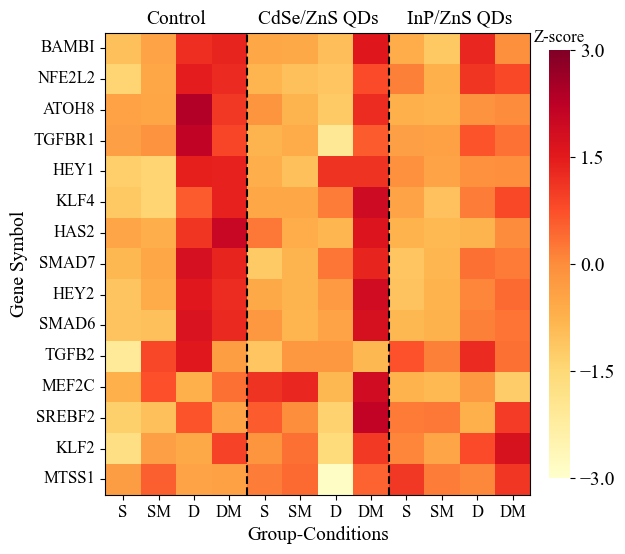

In [16]:
#the last code that I used 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import zscore
from matplotlib import rcParams

# Set the font globally to Times New Roman with a larger size
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
rcParams.update({'font.size': 14})  # Update the font size as needed

def plot_grouped_heatmap(df, groups, conditions, figsize=(8, 10), cmap='YlOrRd', z_score_limits=(-2, 2), save_path=None):
    # Apply z-score normalization per row
    df_scaled = df.apply(zscore, axis=1)
    
    # Cap the Z-scores to the limits provided
    df_scaled = df_scaled.clip(*z_score_limits)

    # Hierarchical clustering for rows if requested
    row_linkage = linkage(pdist(df_scaled, metric='euclidean'), method='ward')
    row_order = dendrogram(row_linkage, no_plot=True)['leaves']
    df_scaled = df_scaled.iloc[row_order, :]

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the heatmap
    sns.heatmap(df_scaled, cmap=cmap, ax=ax, cbar_kws={'fraction': 0.046, 'pad': 0.04}, vmin=z_score_limits[0], vmax=z_score_limits[1])
    # Draw vertical lines to separate the groups
    for i in range(len(groups) - 1):  # Skip the last group
        line_position = (i + 1) * len(conditions)
        ax.axvline(x=line_position, color='black', linestyle='--')

    # Customize the ticks and labels
    condition_positions = np.arange(0.5, len(conditions) * len(groups), 1)
    ax.set_xticks(condition_positions)
    ax.set_xticklabels(conditions * len(groups), rotation=0, ha='center', fontsize=12)  # Set a smaller font size if needed
    
    # Create secondary x-axis for group labels
    ax2 = ax.twiny()
    group_positions = [i * len(conditions) + len(conditions) / 2 for i in range(len(groups))]
    ax2.set_xticks(group_positions)
    ax2.set_xticklabels(groups, rotation=0, ha='center', fontsize=14)  # Larger font size for group labels
    ax2.set_xlim(ax.get_xlim())
    ax2.tick_params(axis='x', which='both', length=0)

    ax.set_yticklabels(df_scaled.index, rotation=0, fontsize=12)  # Set a smaller font size if needed

    # Customize the colorbar
    cbar = ax.collections[0].colorbar
    cbar.ax.set_title('Z-score', fontsize=12)
    cbar.set_ticks(np.linspace(z_score_limits[0], z_score_limits[1], 5))  # Set custom ticks

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)

    plt.show()

# usage
# Load your data into a DataFrame for Apoptotic
df_long = pd.read_csv('Apoptotic Processes_genes_stacked.csv')

# Pivot the data into a 'wide' format suitable for heatmap with MultiIndex columns (Group, Condition)
df_wide = df_long.pivot_table(index='Gene Symbol', columns=['Group', 'Conditions'], values='Gene Expression')

# Define the order of groups and conditions
groups = ['Control', 'CdSe/ZnS QDs', 'InP/ZnS QDs']
conditions = ['S', 'SM', 'D', 'DM']

# Sort the DataFrame to ensure the order of conditions within each group
df_sorted = df_wide.reindex(pd.MultiIndex.from_product([groups, conditions], names=['Group', 'Conditions']), axis=1)

# Drop any NaNs that might disrupt the heatmap
df_sorted.dropna(axis=1, how='all', inplace=True)  # Drop columns where all values are NaN
df_sorted.dropna(axis=0, how='all', inplace=True)  # Drop rows where all values are NaN

# Plot the heatmap with specified Z-score limits
z_score_limits = (-3, 3)  # Adjust the Z-score limits as needed
plot_grouped_heatmap(df_sorted, groups, conditions, figsize=(6, 6), z_score_limits=z_score_limits, save_path='Heatmap_Apoptotic Processes_genes.png')

# Load your data into a DataFrame for Cell Stress and Inflammation
df_long = pd.read_csv('Cell Stress and Inflammation_genes_stacked.csv')

# Pivot the data into a 'wide' format suitable for heatmap with MultiIndex columns (Group, Condition)
df_wide = df_long.pivot_table(index='Gene Symbol', columns=['Group', 'Conditions'], values='Gene Expression')

# Define the order of groups and conditions
groups = ['Control', 'CdSe/ZnS QDs', 'InP/ZnS QDs']
conditions = ['S', 'SM', 'D', 'DM']

# Sort the DataFrame to ensure the order of conditions within each group
df_sorted = df_wide.reindex(pd.MultiIndex.from_product([groups, conditions], names=['Group', 'Conditions']), axis=1)

# Drop any NaNs that might disrupt the heatmap
df_sorted.dropna(axis=1, how='all', inplace=True)  # Drop columns where all values are NaN
df_sorted.dropna(axis=0, how='all', inplace=True)  # Drop rows where all values are NaN

# Plot the heatmap with specified Z-score limits
z_score_limits = (-3, 3)  # Adjust the Z-score limits as needed
plot_grouped_heatmap(df_sorted, groups, conditions, figsize=(6, 6), z_score_limits=z_score_limits, save_path='Heatmap_Cell Stress and Inflammation_genes.png')

# Load your data into a DataFrame for Endothelial Cell Adhesion genes
df_long = pd.read_csv('Endothelial Cell Adhesion_genes_stacked.csv')

# Pivot the data into a 'wide' format suitable for heatmap with MultiIndex columns (Group, Condition)
df_wide = df_long.pivot_table(index='Gene Symbol', columns=['Group', 'Conditions'], values='Gene Expression')

# Define the order of groups and conditions
groups = ['Control', 'CdSe/ZnS QDs', 'InP/ZnS QDs']
conditions = ['S', 'SM', 'D', 'DM']

# Sort the DataFrame to ensure the order of conditions within each group
df_sorted = df_wide.reindex(pd.MultiIndex.from_product([groups, conditions], names=['Group', 'Conditions']), axis=1)

# Drop any NaNs that might disrupt the heatmap
df_sorted.dropna(axis=1, how='all', inplace=True)  # Drop columns where all values are NaN
df_sorted.dropna(axis=0, how='all', inplace=True)  # Drop rows where all values are NaN

# Plot the heatmap with specified Z-score limits
z_score_limits = (-3, 3)  # Adjust the Z-score limits as needed
plot_grouped_heatmap(df_sorted, groups, conditions, figsize=(6, 6), z_score_limits=z_score_limits, save_path='Heatmap_Endothelial Cell Adhesion_genes.png')

# Load your data into a DataFrame for Mitosis and Cell Development
df_long = pd.read_csv('Mitosis and Cell Development_genes_stacked.csv')

# Pivot the data into a 'wide' format suitable for heatmap with MultiIndex columns (Group, Condition)
df_wide = df_long.pivot_table(index='Gene Symbol', columns=['Group', 'Conditions'], values='Gene Expression')

# Define the order of groups and conditions
groups = ['Control', 'CdSe/ZnS QDs', 'InP/ZnS QDs']
conditions = ['S', 'SM', 'D', 'DM']

# Sort the DataFrame to ensure the order of conditions within each group
df_sorted = df_wide.reindex(pd.MultiIndex.from_product([groups, conditions], names=['Group', 'Conditions']), axis=1)

# Drop any NaNs that might disrupt the heatmap
df_sorted.dropna(axis=1, how='all', inplace=True)  # Drop columns where all values are NaN
df_sorted.dropna(axis=0, how='all', inplace=True)  # Drop rows where all values are NaN

# Plot the heatmap with specified Z-score limits
z_score_limits = (-3, 3)  # Adjust the Z-score limits as needed
plot_grouped_heatmap(df_sorted, groups, conditions, figsize=(6, 6), z_score_limits=z_score_limits, save_path='Heatmap_Mitosis and Cell Development_genes.png')

# Load your data into a DataFrame for Shear Stress
df_long = pd.read_csv('Shear Stress 2_genes_stacked.csv')

# Pivot the data into a 'wide' format suitable for heatmap with MultiIndex columns (Group, Condition)
df_wide = df_long.pivot_table(index='Gene Symbol', columns=['Group', 'Conditions'], values='Gene Expression')

# Define the order of groups and conditions
groups = ['Control', 'CdSe/ZnS QDs', 'InP/ZnS QDs']
conditions = ['S', 'SM', 'D', 'DM']

# Sort the DataFrame to ensure the order of conditions within each group
df_sorted = df_wide.reindex(pd.MultiIndex.from_product([groups, conditions], names=['Group', 'Conditions']), axis=1)

# Drop any NaNs that might disrupt the heatmap
df_sorted.dropna(axis=1, how='all', inplace=True)  # Drop columns where all values are NaN
df_sorted.dropna(axis=0, how='all', inplace=True)  # Drop rows where all values are NaN

# Plot the heatmap with specified Z-score limits
z_score_limits = (-3, 3)  # Adjust the Z-score limits as needed
plot_grouped_heatmap(df_sorted, groups, conditions, figsize=(6, 6), z_score_limits=z_score_limits, save_path='Heatmap_Shear Stress_genes.png')



In [ ]:
# For Barplot

